# Train the model with transfer learning

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import pickle
from shutil import copy2
import tensorflow
import IPython

### Import the model

In [16]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 10 

model = Sequential()

model.add(ResNet50(    
  include_top=False,          
  weights='imagenet', 
  pooling='avg' 
))

model.add(Dense(
  num_classes, 
  activation='softmax' 
))

model.layers[0].trainable = False

In [17]:
model.compile(
  optimizer='sgd', 
  loss='categorical_crossentropy', 
  metrics=['accuracy'] 
)

### Create data generators

In [18]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator_with_aug = data_generator_with_aug.flow_from_directory(
        working_train_dir,
        target_size=(image_size, image_size),
        batch_size=4,
        class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
        working_test_dir,
        target_size=(image_size, image_size),
        class_mode='categorical')

Found 3547 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


### Train the model

In [10]:
history_aug = model.fit_generator(
        train_generator_with_aug,
        steps_per_epoch=10,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=1)

Instructions for updating:
Use tf.cast instead.
887/887 [==============================] - 499s 563ms/step - loss: 1.4998 - acc: 0.4849 - val_loss: 1.0255 - val_acc: 0.6725


In [12]:
with open('history.pkl', 'wb') as f:
    pickle.dump(history_aug.history, f)

In [36]:
hist = pickle.load(open('../export/export_history-1562512126.pkl', 'rb'))

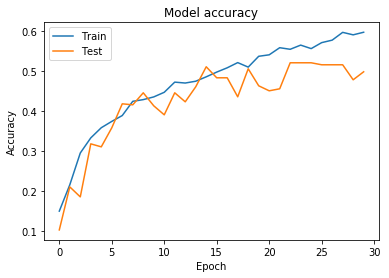

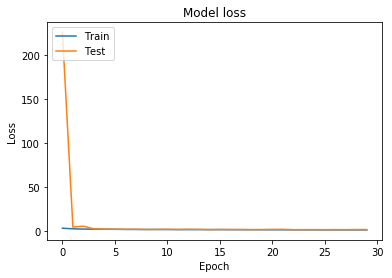

In [37]:
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check the predictions

In [38]:
from tensorflow.python.keras import saving
trained_model = saving.load_model('../export/export_top10-1562512126.h5')

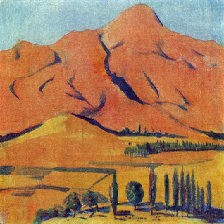

In [46]:
import PIL.Image as Image

rand_top10 = list(top10.index)
random.shuffle(rand_top10)
true_artist = rand_top10[0]
pictures = list(train_3_df[(train_3_df['artist'] == true_artist)]['new_filename'])
img = random.choice(pictures)
image_name = train_dir + img
image = Image.open(image_name).resize((image_size, image_size))
image

In [47]:
print('Artist: ' + true_artist)

Artist: Martiros Saryan


In [48]:
image = np.array(image)/255.0
result = trained_model.predict(image[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
result

array([[9.4019593e-04, 2.7430588e-05, 6.4524897e-07, 4.3433689e-04,
        1.7842097e-04, 1.5982118e-04, 1.5097749e-04, 1.1114571e-03,
        9.9645871e-01, 5.3792936e-04]], dtype=float32)

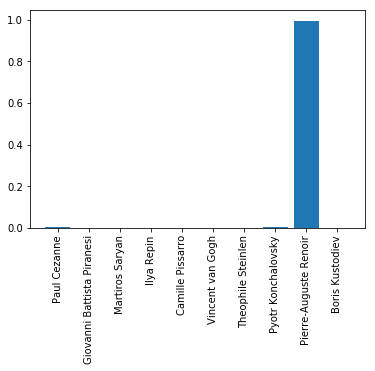

In [49]:
plt.bar(range(10), result[0])
plt.xticks(range(10), top10.index, rotation=90)
plt.show()

In [24]:
df

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg
5,Tosa Mitsuoki,NaN,mythological painting,25528.0,3000.0,10496349.0,wikiart,Yamato-e,Night March of a Hundred Demons (left half),train_only,True,29855.jpg
6,Barnett Newman,NaN,abstract,7345.0,8640.0,6383948.0,wikiart,Color Field Painting,"Who’s Afraid of Red, Yellow and Blue II",train_only,True,62252.jpg
7,Hiroshige,1838,bird-and-flower painting,6483.0,9276.0,12762418.0,wikiart,Ukiyo-e,Small Bird on a Branch of Kaidozakura,train_and_test,False,49823.jpg
8,Barnett Newman,1963.0,abstract,6049.0,8206.0,1135960.0,wikiart,Color Field Painting,Black Fire I,train_only,True,63861.jpg
9,Franz Richard Unterberger,NaN,cityscape,6238.0,7352.0,7896792.0,wikiart,Romanticism,Procession in Naples,train_and_test,False,84512.jpg


In [26]:
history_aug.history['loss']

[1.4671297390964424]

In [10]:
tensorflow.keras.__version__

'2.2.4-tf'

In [23]:
import keras
keras.__version__

'2.2.4'